In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the data set
newbasketdf = pd.read_csv('data/new_df.csv', index_col=0, decimal='.')

In [3]:
newbasketdf.head()

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
CustomerID,,,,,,,
12347.0,182,103,47,4.943568,7,4310.00,615.714286
12348.0,31,22,17,3.163994,4,1797.24,449.310000
12349.0,73,73,73,3.897416,1,1757.55,1757.550000
12350.0,17,17,17,2.772224,1,334.40,334.400000
12352.0,85,59,18,3.850853,8,2506.04,313.255000


CLUSTERING

PREPROCESSING OF DATA - NORMALIZATION  

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(newbasketdf.values)

K-Means
We need the K value, which is the number of clusters

In [5]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(scaled_df )

In [6]:
print(y_km)

[0 1 0 ... 1 2 0]


[[ 0.39312045  0.05148406]
 [-0.11982931  0.06603781]
 [ 0.2388102  -0.3077171 ]
 ...
 [-0.28204101  0.0466365 ]
 [ 1.33816407  0.10060961]
 [ 0.10184615 -0.05932126]]


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


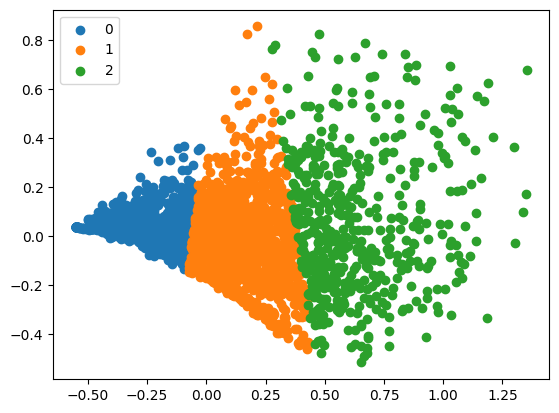

In [7]:
#Kmeans clustering with 3 clusters
#Importing required modules

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_df)
 
print(df)
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

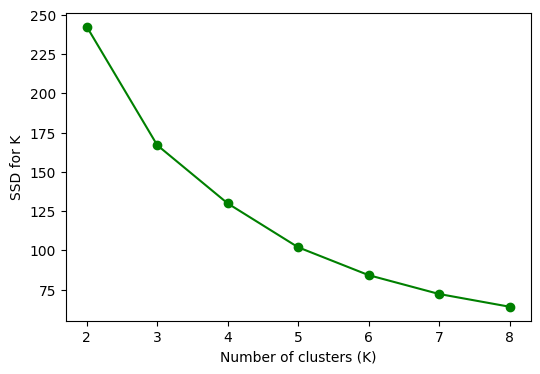

In [9]:
#The elbow method to identify the suitable number of clusters
# calculate distortion for a range of number of cluster
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

The elbow starts at 5. Hence the ideal k value is 5.

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

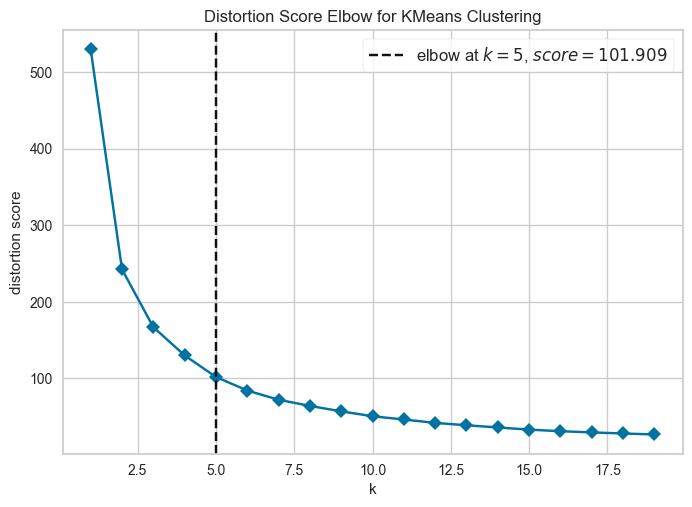

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
visualizer = KElbowVisualizer(
    km, k=(1,20), metric='distortion', timings=False)
visualizer.fit(df)
visualizer.show()

In [9]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=20, max_iter=100)
kmeans.fit(scaled_df)
hist, bins = np.histogram(kmeans.labels_,
                          bins=range(0, len(set(kmeans.labels_)) + 1))

In [10]:
##***
dict(zip(bins, hist))

{0: 624, 1: 1687, 2: 214, 3: 1192, 4: 454}

[[ 0.39312045  0.05148406]
 [-0.11982931  0.06603781]
 [ 0.2388102  -0.3077171 ]
 ...
 [-0.28204101  0.0466365 ]
 [ 1.33816407  0.10060961]
 [ 0.10184615 -0.05932126]]


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


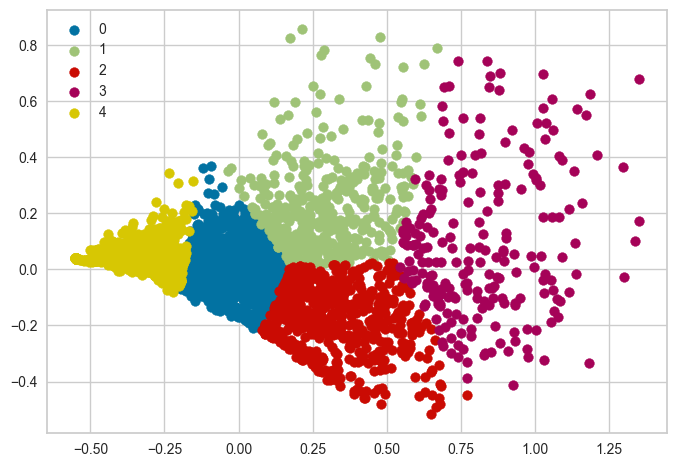

In [11]:
#Kmeans clustering with 5 clusters
#Importing required modules

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_df)
 
print(df)
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

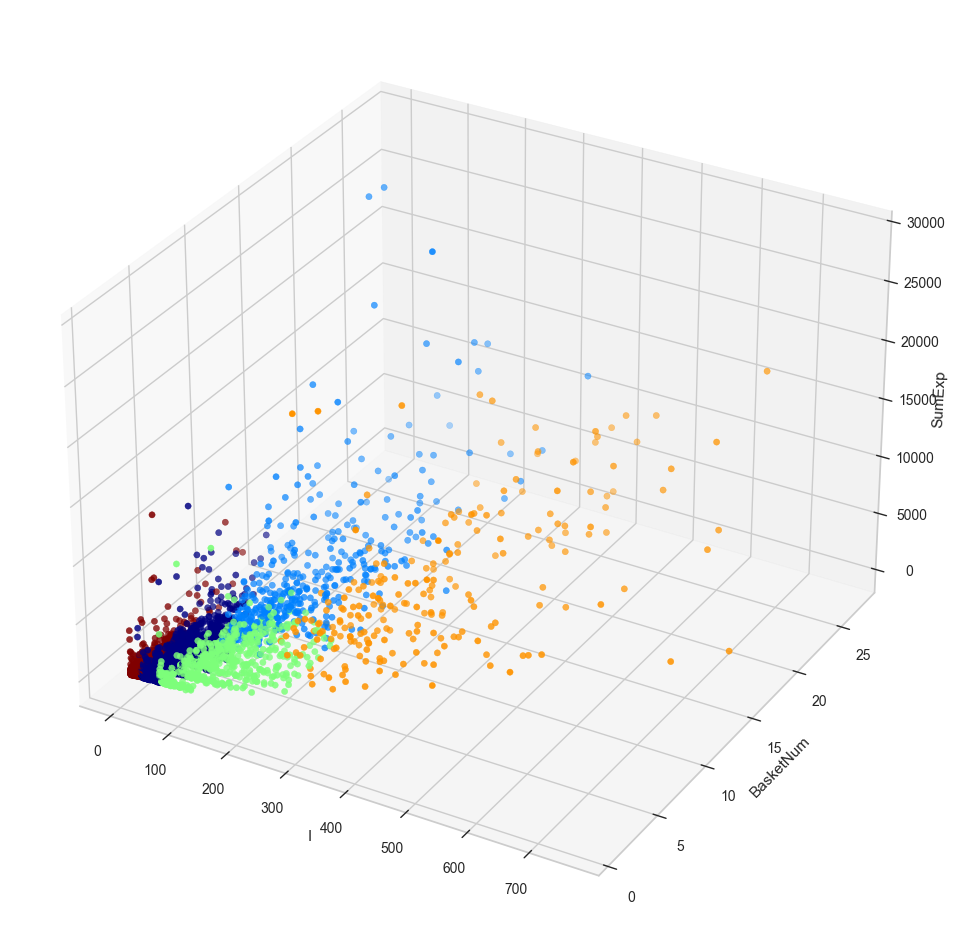

In [12]:
fig = plt.figure(figsize=(16,12))
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(newbasketdf['I'],
           newbasketdf['BasketNum'],
           newbasketdf['SumExp'],
           c=kmeans.labels_, marker='o', cmap=plt.cm.get_cmap('jet'))
ax2.set_xlabel('I')
ax2.set_ylabel('BasketNum')
ax2.set_zlabel('SumExp')
plt.show()

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5262199932861675


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4445455843659948


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.41443597323206455


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.41099662013785193


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.40736063322922855


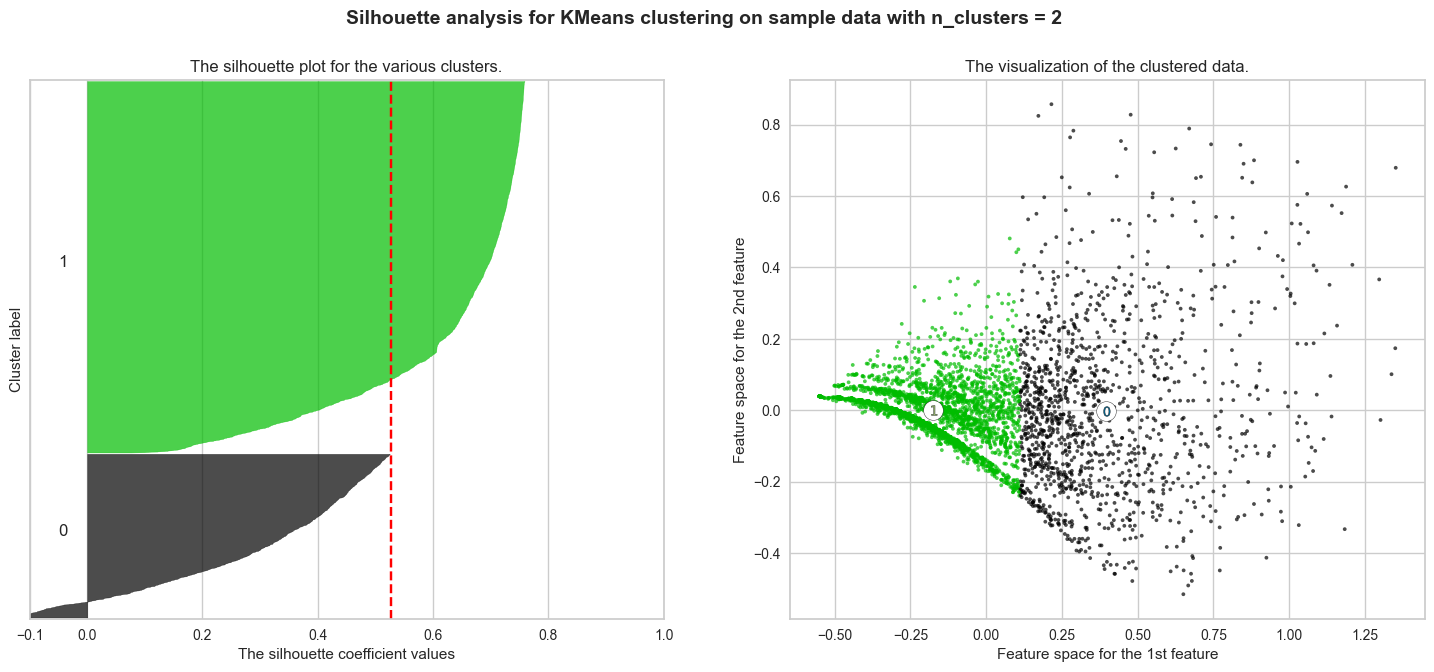

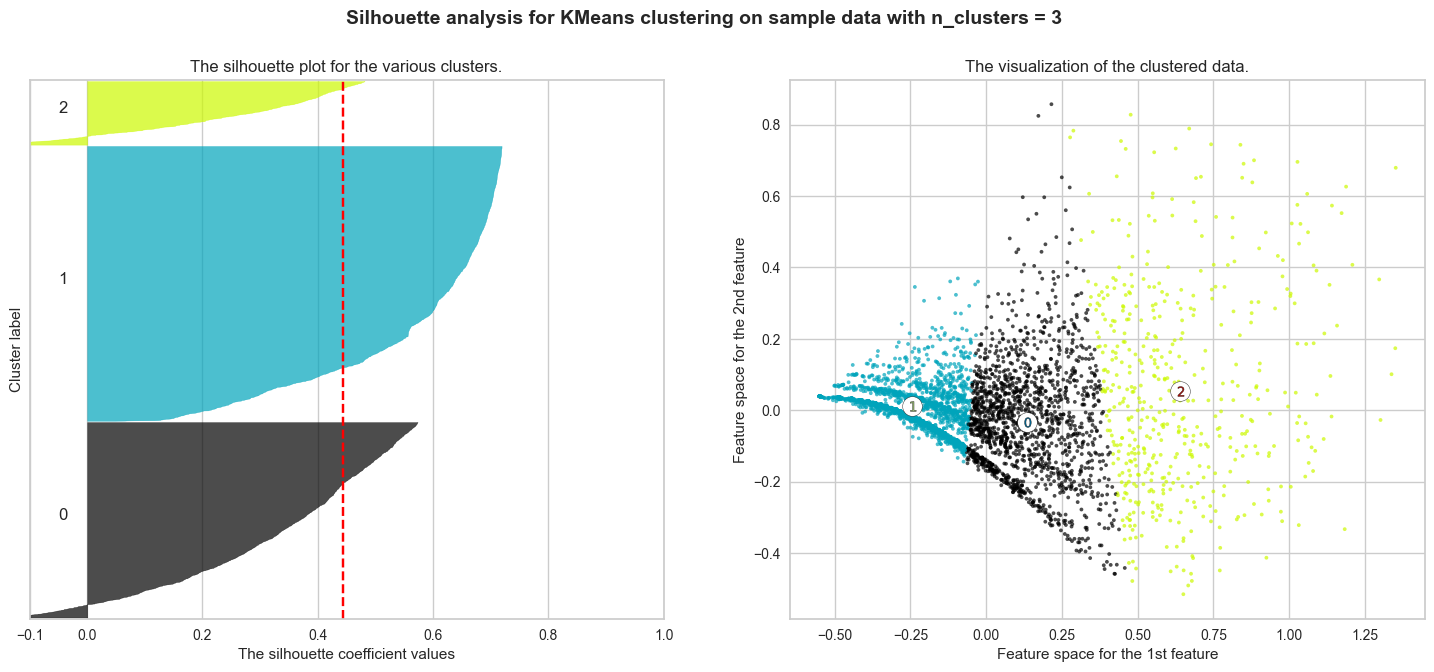

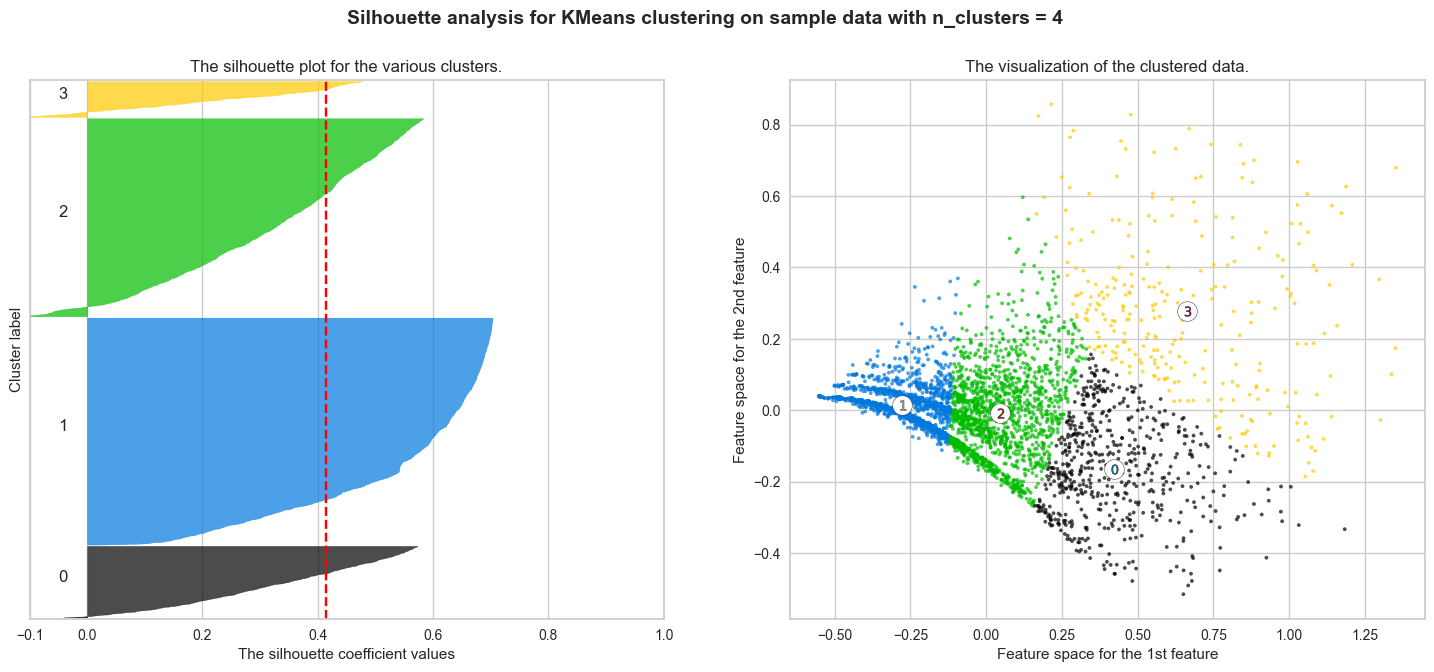

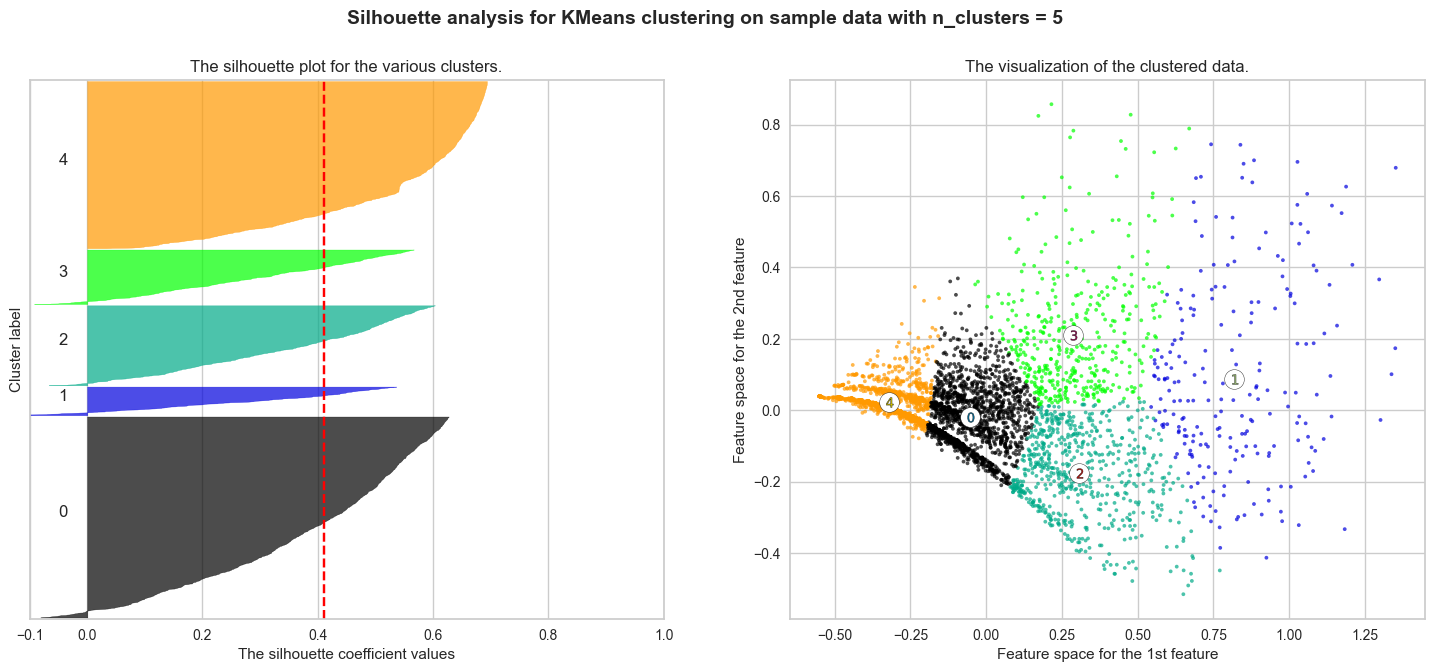

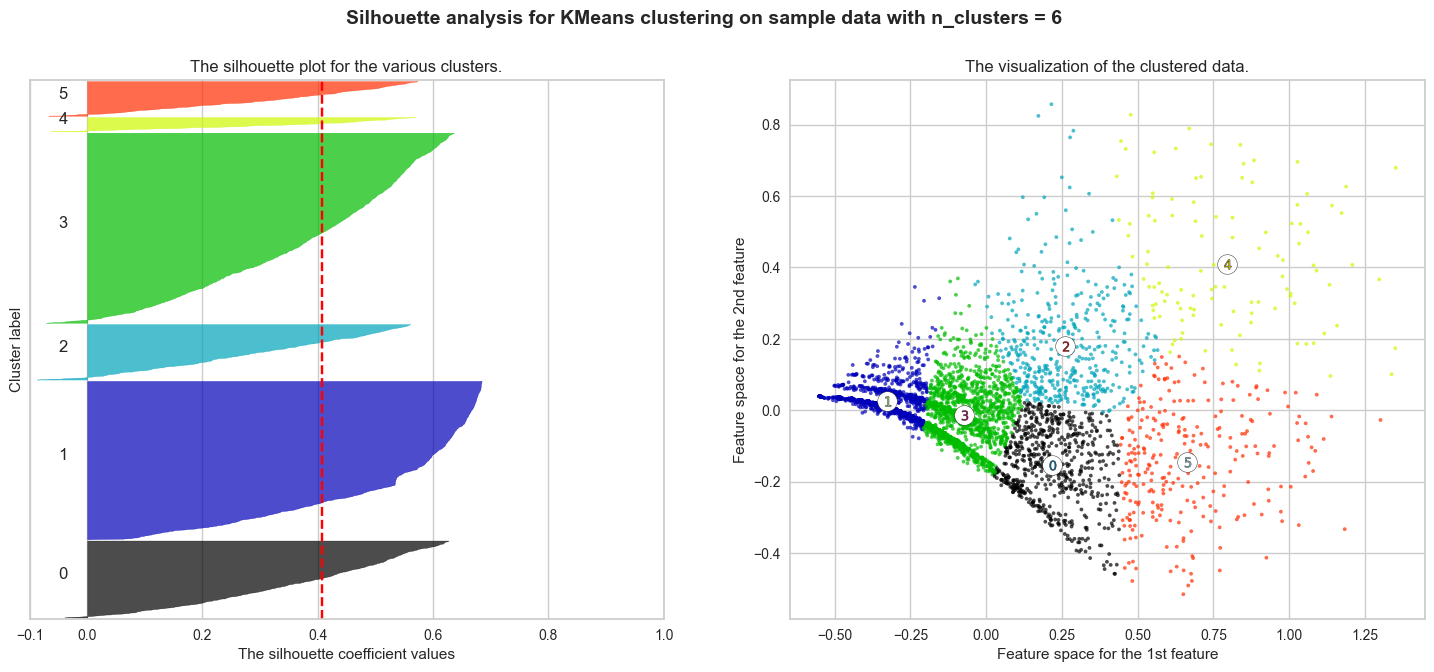

In [13]:
#Silhoutte Analysis

#generating the silhoutte maps and scores to check the ideal number of clusters to be chosen
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df[:, 0], df[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(scaled_df)

DBSCAN(eps=2, min_samples=2)

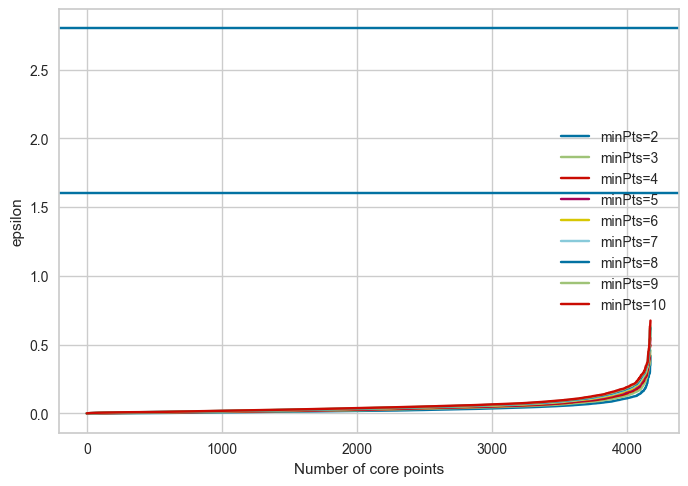

In [ ]:
#DBScan Clustering
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
    
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(1.6)
plt.axhline(2.8)
plt.legend()
plt.show()

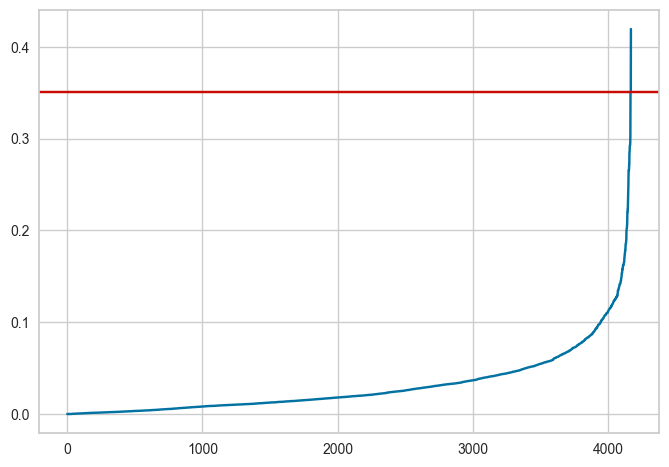

In [15]:
#elbow/knee method to find the best of eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

min_pts = newbasketdf.shape[1] * 2
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
kneedle = KneeLocator(range(distances.shape[0]), distances, S=1.0, curve="convex", direction="increasing")
plt.plot(range(distances.shape[0]), distances)
eps = kneedle.knee_y
plt.axhline(y=eps, color='r', linestyle='-', label="eps")
plt.show()

In [16]:
print(eps)

0.35098101261991416


In [17]:
dbscan = DBSCAN(eps=eps, min_samples=min_pts)
dbscan.fit(scaled_df)

DBSCAN(eps=0.35098101261991416, min_samples=14)

In [ ]:
labels, counts = np.unique(dbscan.labels_, return_counts=True)
print(labels, counts)

[-1  0] [  15 4156]


In [18]:
plt.bar(x=range(len(counts)), height=counts, width=0.3)
plt.xticks(np.arange(2))
plt.xlabel("Cluster")
plt.ylabel("Customer")
plt.show()

NameError: name 'counts' is not defined

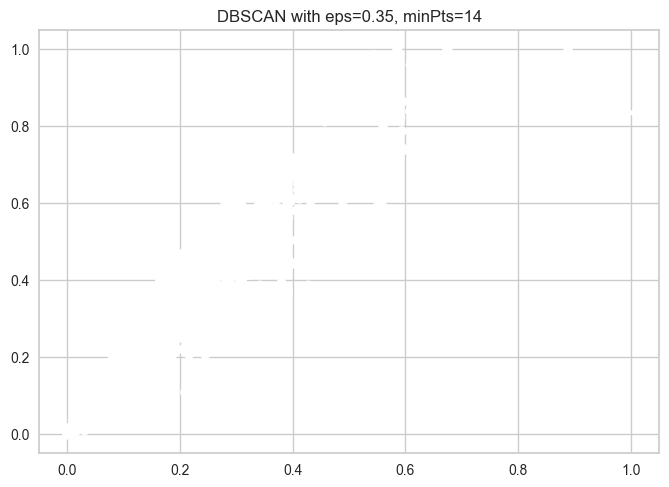

In [ ]:
y_dbscan = dbscan.labels_
noise_mask = y_dbscan<0
plt.figure()
plt.scatter(x=scaled_df[~noise_mask,0], y=scaled_df[~noise_mask,1], c=y_dbscan[~noise_mask])
plt.scatter(x=scaled_df[noise_mask,0], y=scaled_df[noise_mask,1], c=y_dbscan[noise_mask], marker='x')
plt.title("DBSCAN with eps=0.35, minPts=14")
plt.show()

Hierarchical Clustering

In [19]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# auxiliary funciton to generate dendrogram with
# given method and metric
def hierarchical(method, metric):
    data_dist = pdist(scaled_df, metric=metric)
    data_link = linkage(data_dist, method=method, metric=metric)
    dendrogram(data_link, truncate_mode='lastp')

    max_d = 0.7*max(data_link[:,2])
    app = fcluster(data_link, max_d, criterion='distance')
    print(np.unique(app, return_counts=True))

(array([1, 2, 3, 4], dtype=int32), array([   2, 4167,    1,    1], dtype=int64))


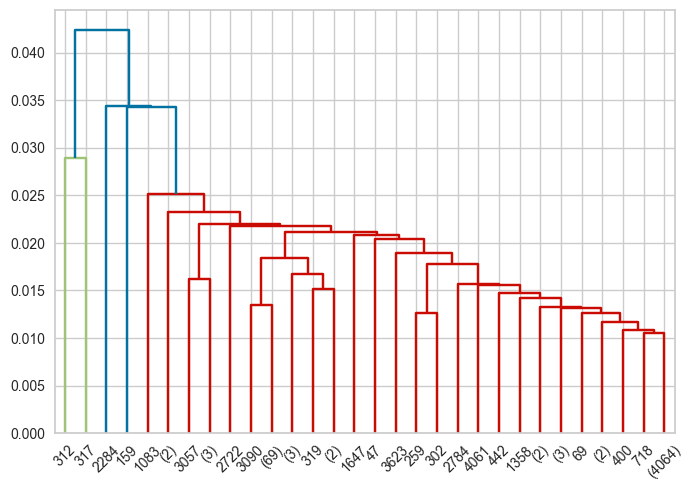

In [ ]:
hierarchical(method='single', metric='cosine')

(array([1, 2, 3, 4], dtype=int32), array([  74, 1081,  126, 2890], dtype=int64))


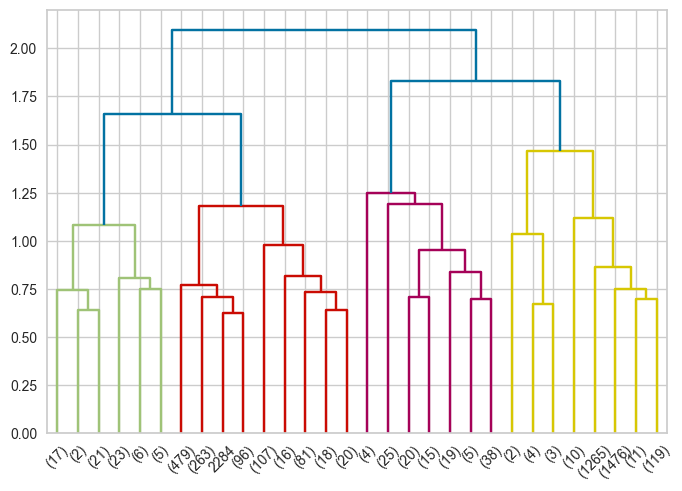

In [20]:
hierarchical(method='complete', metric='euclidean')

(array([1, 2, 3, 4], dtype=int32), array([ 155, 4008,    3,    5], dtype=int64))


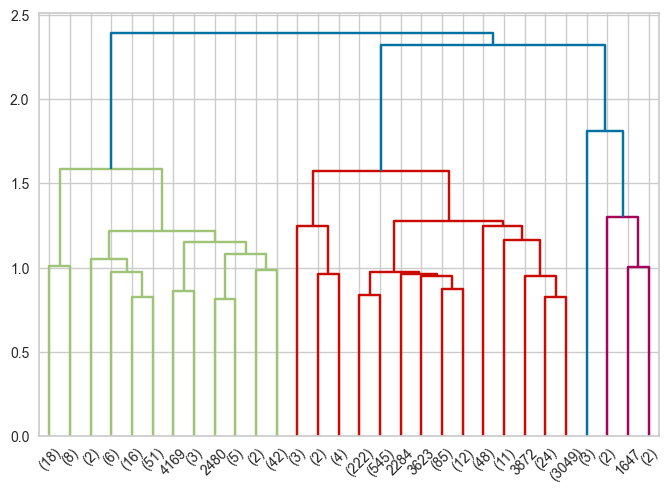

In [ ]:

hierarchical(method='average', metric='cityblock')

(array([1, 2], dtype=int32), array([  76, 4095], dtype=int64))


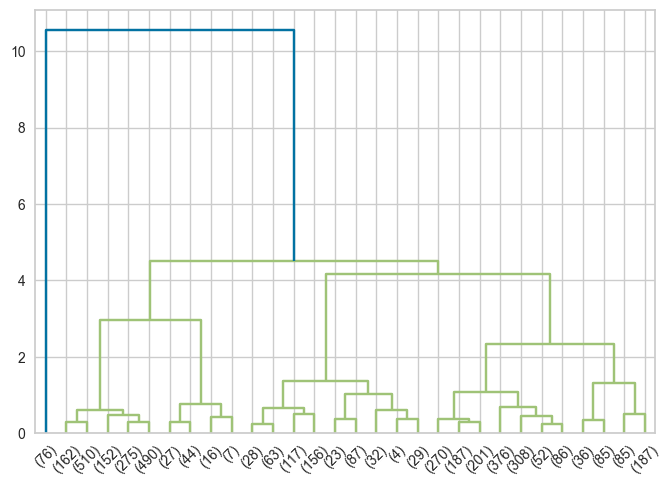

In [21]:

hierarchical(method='ward', metric='cosine')

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(scaled_df)

C:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


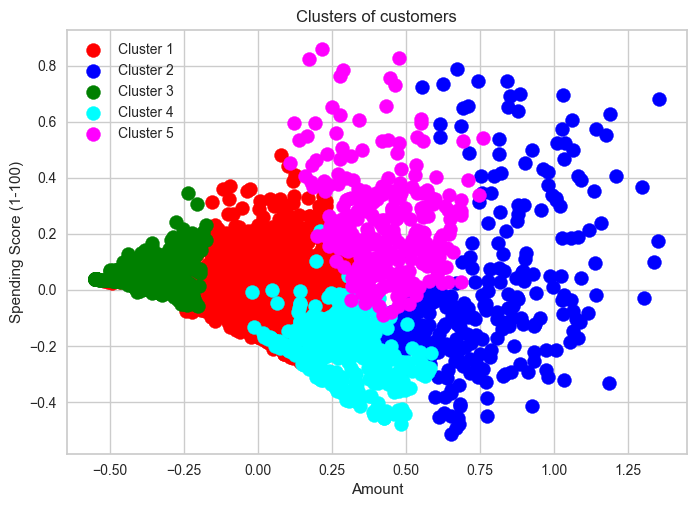

In [25]:
# Visualising the clusters
plt.scatter(df[y_hc == 0, 0], df[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_hc == 1, 0], df[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_hc == 2, 0], df[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_hc == 3, 0], df[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[y_hc == 4, 0], df[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Amount')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

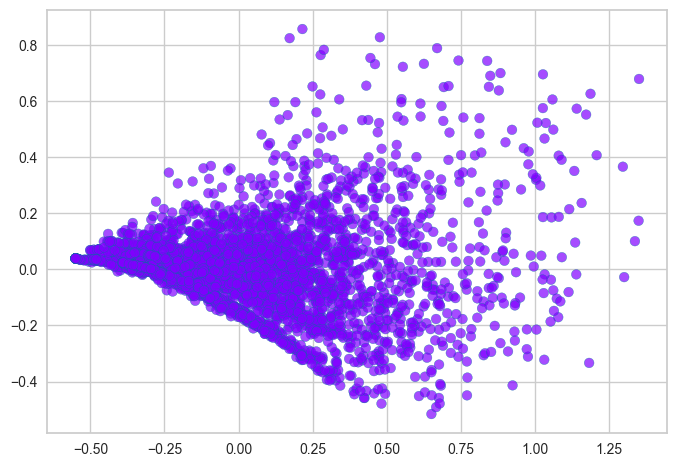

In [26]:
#BIRCH clustering
from sklearn.cluster import Birch

modelbirch = Birch(branching_factor = 50, n_clusters = None, threshold =0.5)
modelbirch.fit(df)
# Predict the same data
pred = modelbirch.predict(df)
 
# Creating a scatter plot
plt.scatter(df[:, 0], df[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()